# Procedimientos para usar este Notebook

- Instalar [Anaconda](https://www.anaconda.com/)
- Abrir el prompt de Anaconda, dirigirse al directorio de trabajo y activar el entorno virtual:

    `conda env create -f entorno_SIMCA.yml`
        
    `conda activate entorno_SIMCA`


- Una vez activado el entorno, ejecutar el siguiente comando en el prompt:

    `jupyter notebook`

Ejecutar la siguiente celda para crear directorio para datos custom:

In [41]:
#crear directorio Custom  
import os

base_dir = os.getcwd()

if not os.path.exists("Output"):
    os.makedirs("Output")

# Códigos 

Códigos que ejecutan los diferentes móludos de SIMCA por medio de la API https://apiprocess.ihcantabria.com/chambo-apiprocess y devuelven las tablas con resultados.

In [1]:
import json
import pandas as pd     
import requests    
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def MELCA(sub_catchment_id,initial_date,final_date,series,global_tau,snow_par):

    url = "https://apiprocessdev.ihcantabria.com/chambo-apiprocess/CHAMBO Models/SAJA_BESAYA"


    param={
          "sub-catchment id": sub_catchment_id,
          "initial date": initial_date,
          "final date": final_date,
          "series": series,
          "global_tau": global_tau,
          "snow": snow_par
        } 

    print('Runing MELCA ...')

    post_np=requests.post(url,  json =param)     
    result=pd.DataFrame(json.loads(post_np.text))

    print('Writing tables ...')
    
    if series:
        result.to_csv("Quality_series.csv")
    else:
        result.to_csv("MELCA_Output.csv")  
    
    return result

In [30]:
#Parámetros
sub_catchment_id=1 
initial_date="2000-01-01"
final_date="2019-31-12"
global_tau=20
snow=False

# Módulo MELCA

In [31]:
Resultados_tramos=MELCA(sub_catchment_id,initial_date,final_date,False,global_tau,snow)
print('Finished')

Runing MELCA ...
Writing tables ...
Finished


### Resultados por tramos:

In [32]:
Resultados_tramos

,area,area_ac,ce_ac,id,petmed,petmed_ac,precmed,precmed_ac,q20_ac,q50_ac,q80_ac,qmed,qmed_ac,qmed_ac_inst,qrmed_ac,smax
0,64.51,1023.81,0.517804,1,1167.705417,1158.823468,1416.352923,1408.962931,5.398452,13.673537,31.698949,1.502086,23.669017,23.669390,23.251734,103.252609
1,0.64,483.78,0.508695,2,1217.629333,1138.788477,1443.378026,1373.662368,2.507284,6.344323,14.608483,0.015180,10.712259,10.712426,10.549081,99.335922
2,14.08,455.55,0.526787,3,1201.464175,1176.875443,1438.684921,1443.816014,2.513843,6.430703,14.765376,0.332527,10.979412,10.979702,10.761126,105.471300
3,19.97,475.52,0.526488,4,1203.689600,1178.001534,1445.200076,1443.874139,2.607045,6.642896,15.280551,0.475260,11.454672,11.454942,11.221119,102.820377
4,10.10,483.14,0.508681,5,1229.984204,1138.684039,1353.965514,1373.570018,2.505834,6.339218,14.588220,0.220428,10.697079,10.697247,10.543849,71.024501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,9.35,9.35,0.478556,86,1106.895657,1106.895657,1190.992177,1190.992177,0.052703,0.134711,0.265023,0.168869,0.168869,0.168894,0.168869,130.006748
86,8.27,8.27,0.505779,87,1052.623943,1052.623943,1221.416781,1221.416781,0.048852,0.129988,0.260554,0.161892,0.161892,0.161916,0.161892,120.761228
87,2.34,18.95,0.461399,88,1115.982638,1117.050153,1116.870535,1099.688933,0.084096,0.231786,0.491443,0.038725,0.304686,0.304727,0.302465,113.599592
88,4.28,16.61,0.460509,89,1090.235581,1117.200543,1135.795277,1097.268406,0.075681,0.204737,0.429351,0.073012,0.265960,0.265997,0.264954,123.934170


### Series temporales:

In [33]:
global_tau=0.1
Saja_series=MELCA(sub_catchment_id,initial_date,final_date,True,global_tau,False) #no snow
Saja_seriess=MELCA(sub_catchment_id,initial_date,final_date,True,global_tau,True) #snow
print('Finished')

Runing MELCA ...
Writing tables ...
Runing MELCA ...
Writing tables ...
Finished


In [34]:
Saja_series

,qinst,qinst_ac,qr,qsim,qsim_ac
0,1.269529,19.898527,19.898527,1.269529,19.898527
1,0.903410,16.018158,18.931354,1.109131,18.054506
2,0.655038,13.628033,16.629803,0.767977,14.782705
3,0.514338,12.214532,14.454462,0.579988,12.901758
4,0.420376,11.082546,12.799823,0.465285,11.643243
...,...,...,...,...,...
7300,0.532190,30.495548,33.676044,0.574079,31.352290
7301,0.466430,29.014982,31.725927,0.498273,29.749818
7302,0.414624,27.710326,30.111048,0.439845,28.358480
7303,0.372279,26.536856,28.715746,0.392985,27.120197


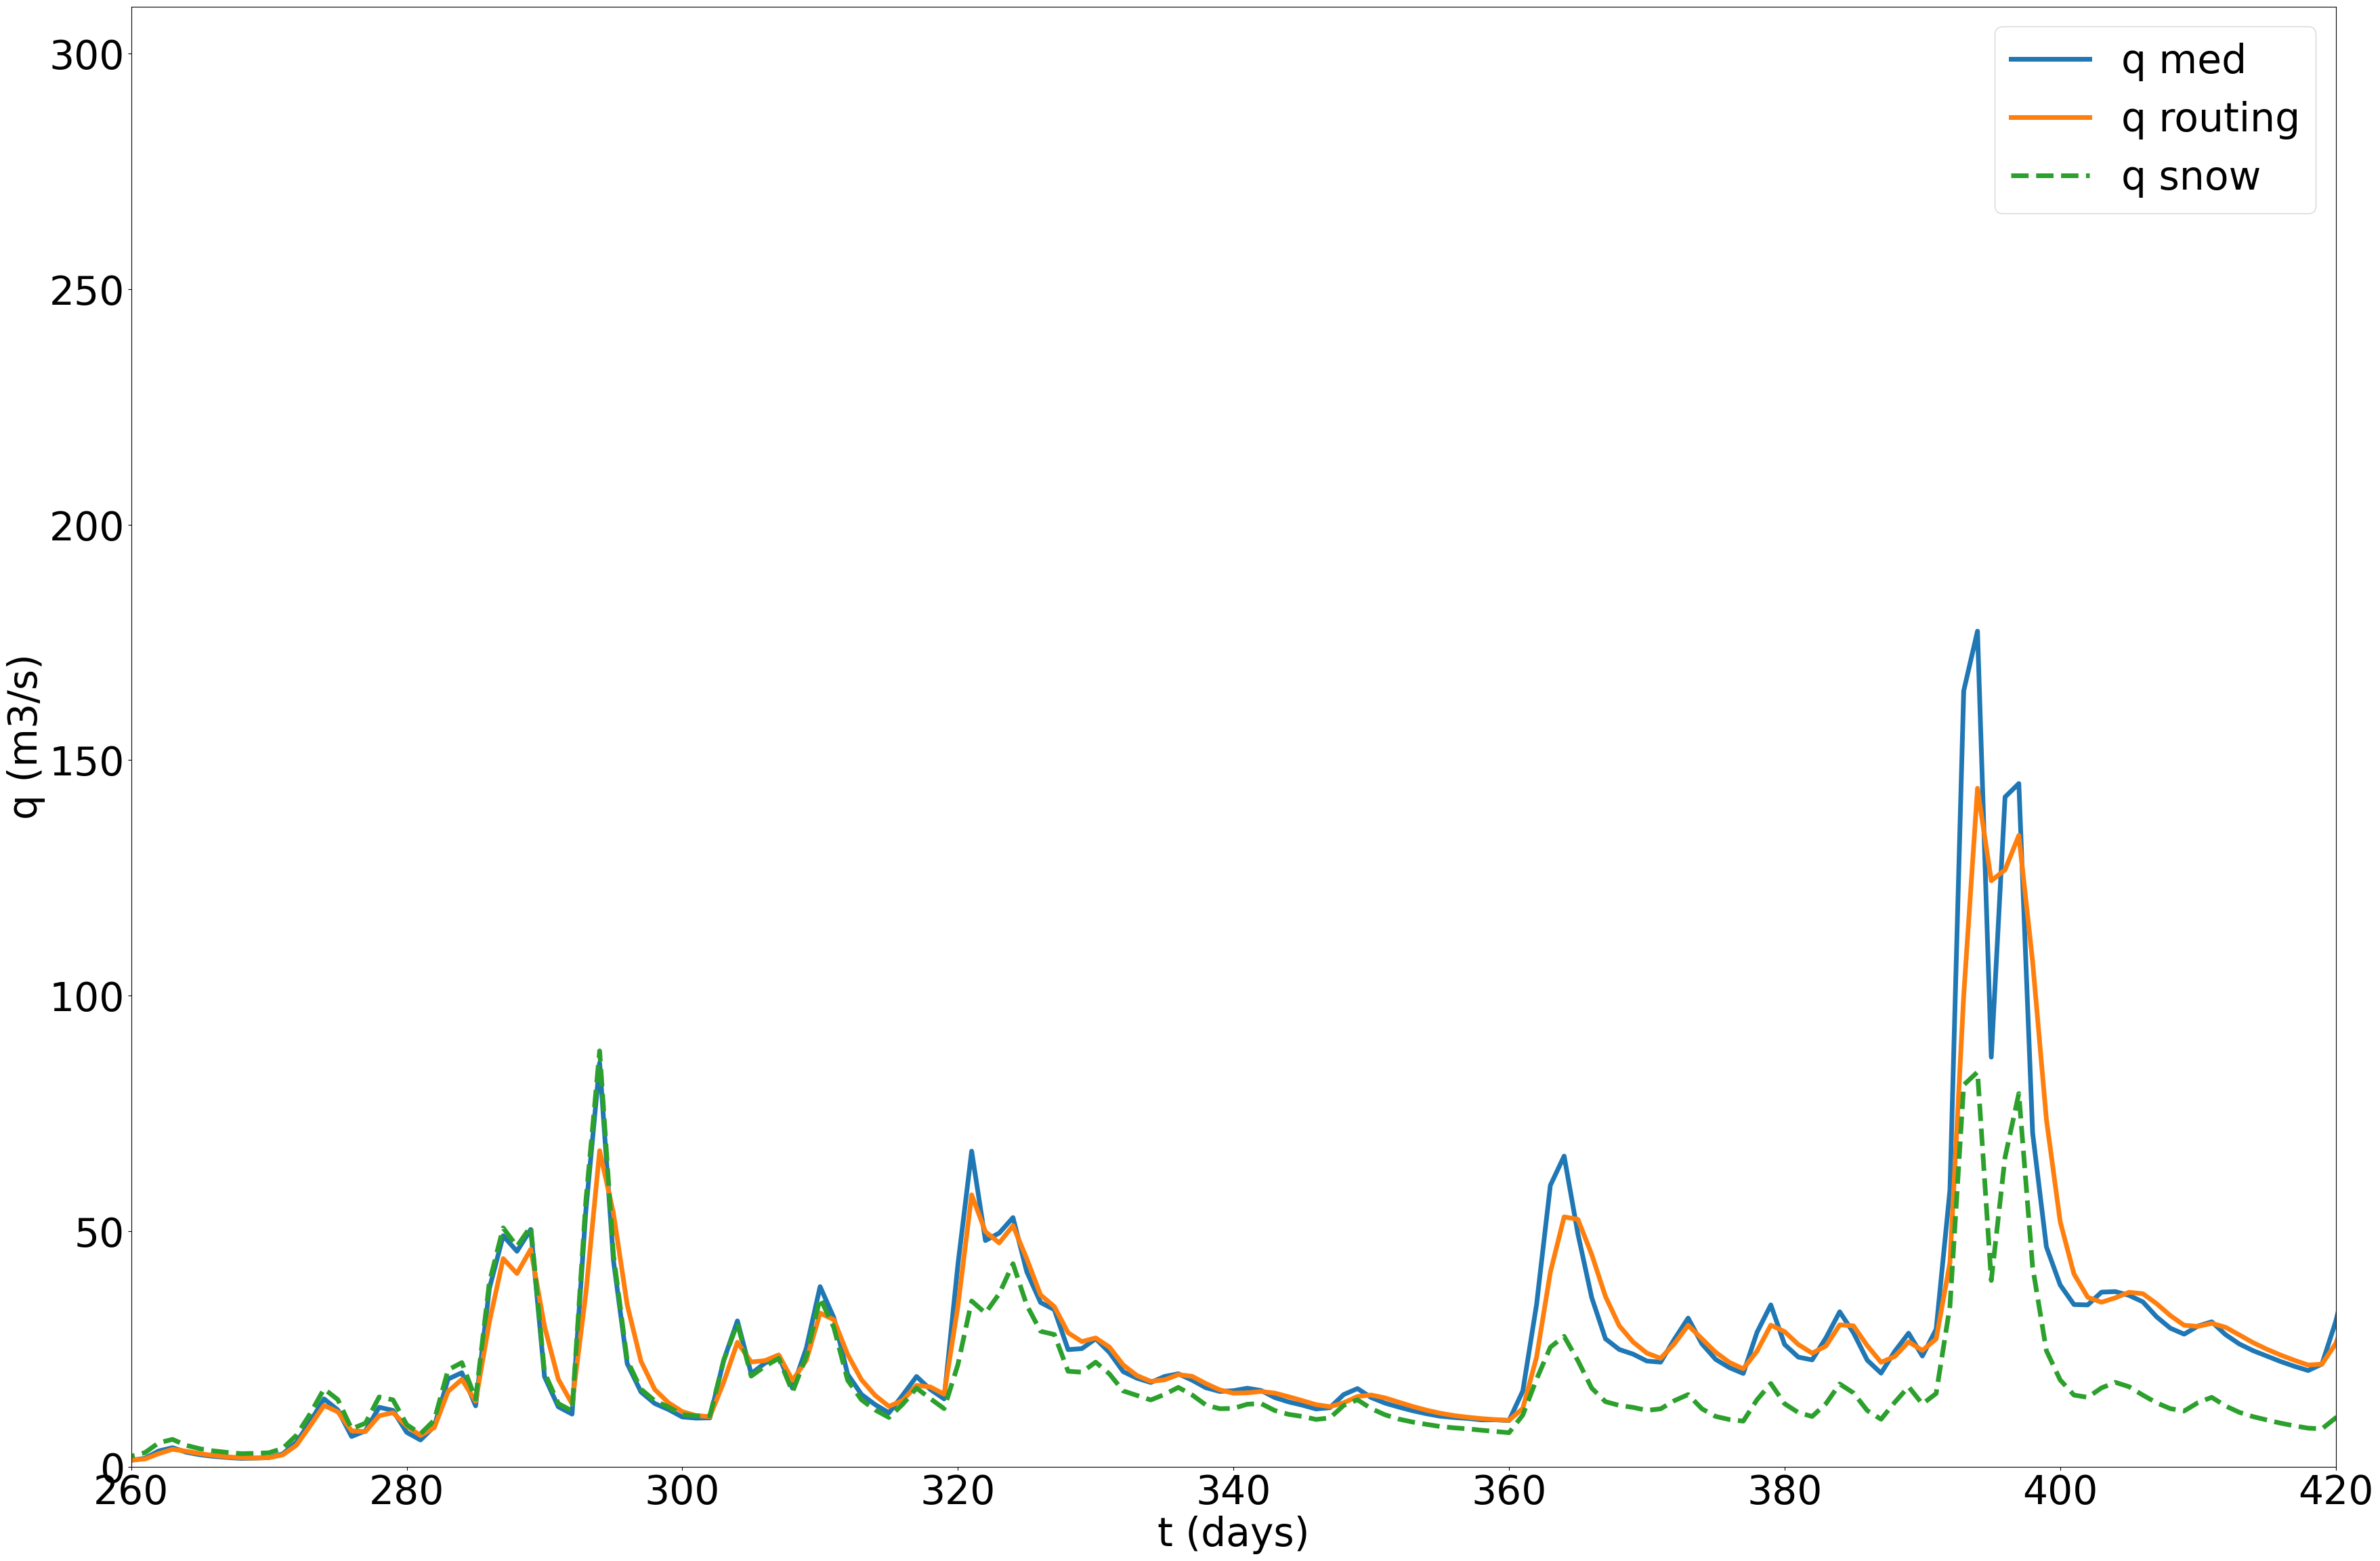

In [35]:
plt.rcParams["figure.figsize"] = [42,28]
plt.rcParams.update({'font.size': 42})

plt.plot(Saja_series['qsim_ac'],linewidth=5)
#plt.plot(Saja_series['qinst_ac'],linewidth=5)
plt.plot(Saja_series['qr'],linewidth=5)
plt.plot(Saja_seriess['qsim_ac'],linewidth=5,linestyle='--')
plt.xlim([260, 420])
plt.ylim([0, 310])
plt.xlabel('t (days)')
plt.ylabel('q (m3/s)')
plt.legend(['q med','q routing', 'q snow'])
plt.savefig("Output/resultados_Saja.png")   